# `Importing Libraries `

In [78]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## defining datasets

In [79]:
df = pd.read_csv("creditcard.csv")
df2 = pd.read_csv("iris.csv")


## **`Making classes and user define function`**

In [80]:



# helper function number 1
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()

# helper function number2
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))

    

#Logistic Regression with penalty
def Logistic(X_train,Y_train):
    clf = LogisticRegression(penalty='l2').fit(X_train,Y_train)
    Y_Test_Pred = clf.predict(X_test)
    #pd.crosstab(Y_Test_Pred, Y_test[Y], rownames=['Predicted'], colnames=['Actual'])
    showresults(clf,Y_Test_Pred)
    
    
    

def showresults(clf,Y_Test_Pred):
    print("Defining Reports")
    generate_model_report(Y_test, Y_Test_Pred)
    generate_auc_roc_curve(clf, X_test)

#undersampling
def Undersampling(df,Y):
    sns.countplot(x=Y,data=df)
    #print(df['Class'].value_counts())
    minority_class_len = len(df[df[Y] == 1])

    majority_class_indices = df[df[Y] == 0].index

    random_majority_indices = np.random.choice(majority_class_indices,
                                            minority_class_len, 
                                            replace=False)

    minority_class_indices = df[df[Y] == 1].index

    under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
    under_sample = df.loc[under_sample_indices]
    sns.countplot(x=Y, data=under_sample)
    return under_sample
    
    

def Oversampling(dataset,X,Y):
    ax = sns.countplot(x=Y,data=dataset)
   # print(Y.value_counts())
    ros = RandomOverSampler(random_state=0)
    X_resampled , Y_resampled = ros.fit_resample(X,Y)
    print(sorted(Counter(Y_resampled).items()),Y_resampled.shape)
    print(sorted(Counter(X_resampled).items()),X_resampled.shape)
    # unique, count = np.unique(Y_train, return_counts=True)
    # Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
    # Y_train_dict_value_count

def randomforest():
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    print(classifier.predict(sc.transform([[30,87000]])))
    y_pred = classifier.predict(X_test)
    print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

def SVM():
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    print(classifier.predict(sc.transform([[30,87000]])))
    y_pred = classifier.predict(X_test)
    print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    

def Bayes():
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    print(classifier.predict(sc.transform([[30,87000]])))
    y_pred = classifier.predict(X_test)
    print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

def XGBoost():
    pass










0    284315
1       492
Name: Class, dtype: int64
Defining Reports
Accuracy =  0.9990637032875719
Precision =  0.7089552238805971
Recall =  0.6985294117647058
F1 Score =  0.7037037037037037


/Users/sarthakpunjabi/Desktop/machine learning and data science/data_with_python/env1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


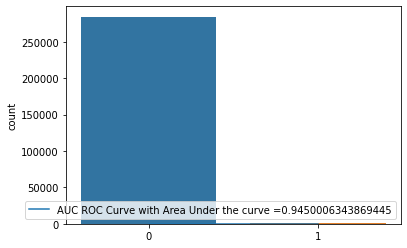

[(0, 284315), (1, 284315)] (568630,)
[('Amount', 1), ('Time', 1), ('V1', 1), ('V10', 1), ('V11', 1), ('V12', 1), ('V13', 1), ('V14', 1), ('V15', 1), ('V16', 1), ('V17', 1), ('V18', 1), ('V19', 1), ('V2', 1), ('V20', 1), ('V21', 1), ('V22', 1), ('V23', 1), ('V24', 1), ('V25', 1), ('V26', 1), ('V27', 1), ('V28', 1), ('V3', 1), ('V4', 1), ('V5', 1), ('V6', 1), ('V7', 1), ('V8', 1), ('V9', 1)] (568630, 30)


AttributeError: 'NoneType' object has no attribute 'iloc'

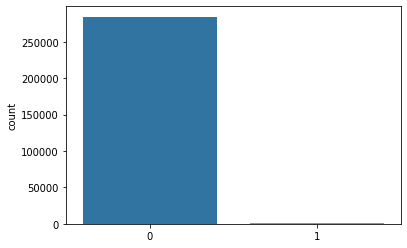

In [81]:
dataset = [df,df2]
for i in dataset:
    while True:
        #preprocessing and spliting the data
        X = i.iloc[:,:-1]
        Y = i.iloc[:,-1]
        le = LabelEncoder()
        Y = le.fit_transform(Y)
        X_train , X_test, Y_train ,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
        ax = sns.countplot(x=Y,data=i)
        print(df['Class'].value_counts())
        Logistic(X_train,Y_train)
        us = Oversampling(i,X,Y)
        X = us.iloc[:,:-1].values
        Y = us.iloc[:,-1].values
        X_train , X_test, Y_train ,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
        Logistic(X_train,Y_train)


        
        break
    break  







    

